
## Support Vector Regressor


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider, Checkbox

from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import seaborn as sns

sns.set_theme()

from utils import *

### Creating Dataset

In [3]:
def f(x,y):
    return ((x*10) **2 )+ (y*10)

def generate_data(n_samples=100):
    x = np.sort(np.random.rand(n_samples))
    y = np.sort(np.random.rand(n_samples))
    z = f(x,y) + 5.0 * np.random.randn(n_samples) 
    return x, y, z

x, y, z = generate_data(200)

xy = np.zeros((len(x),2))
xy[:,0]=x.ravel()
xy[:,1]=y.ravel()

In [4]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [5]:
lin_model = svr_lin.fit(xy, z)
print("Lin_Score = ", lin_model.score(xy,z))

poly_model = svr_poly.fit(xy, z)
print("_Poly_Score = ", lin_model.score(xy,z))

rbf_model = svr_rbf.fit(xy, z)
print("rbf_Score = ", lin_model.score(xy,z))

Lin_Score =  0.9354610371787724
_Poly_Score =  0.9354610371787724
rbf_Score =  0.9354610371787724


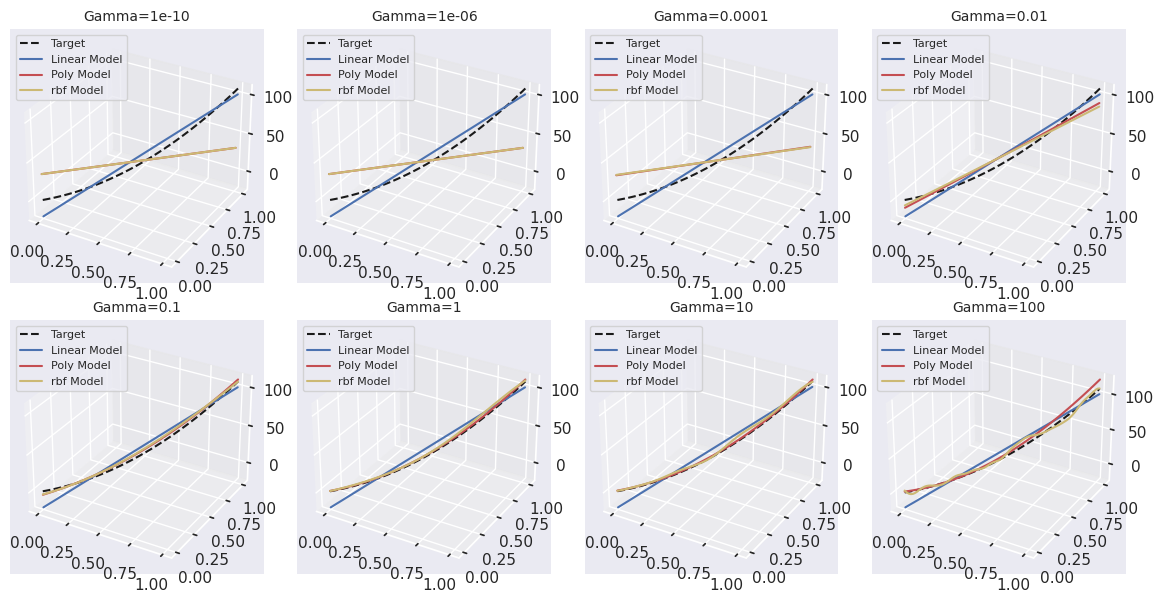

In [6]:
gamma_range = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

fig = plt.figure(figsize=(12,6))
for g in gamma_range:
    #scores = score(lin_model, xy[:, None], z, scoring="neg_mean_squared_error", cv=10)
    svr_rbf = SVR(kernel="rbf", C=100, gamma=g, epsilon=0.1)
    svr_lin = SVR(kernel="linear", C=100, gamma=g)
    svr_poly = SVR(kernel="poly", C=100, gamma=g, degree=3, epsilon=0.1, coef0=1)

    lin_model = svr_lin.fit(xy, z)
    poly_model = svr_poly.fit(xy, z)
    rbf_model = svr_rbf.fit(xy, z)
    
    # plot data and model
    ax = fig.add_subplot(2, 4, gamma_range.index(g) + 1, projection='3d')
    plt.tight_layout()
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
   # ax.scatter(x, y, z, 'g', label="Samples")
    ax.plot(x_test, y_test, lin_model.predict(xy_test), 'b', label="Linear Model")
    ax.plot(x_test, y_test, poly_model.predict(xy_test), 'r', label="Poly Model")
    ax.plot(x_test, y_test, rbf_model.predict(xy_test), 'y', label="rbf Model")
    ax.legend(fontsize=8)
    plt.title("Gamma={}".format(g), fontsize=10)

plt.show()

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# split data to train and validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative mean squared error as a scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# specify range of hyper-parameters
C_range = np.logspace(-2, 3, 6)         # 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3
gamma_range = np.logspace(-2, 3, 6)     # 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3
param_grid = dict(gamma=gamma_range, C=C_range)

# create classifier
grid = GridSearchCV(SVR(kernel="rbf"), param_grid=param_grid, cv=cv, scoring=scorer)

# Train
grid.fit(xy, z)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1000.0, 'gamma': 10.0} with a score of -21.40


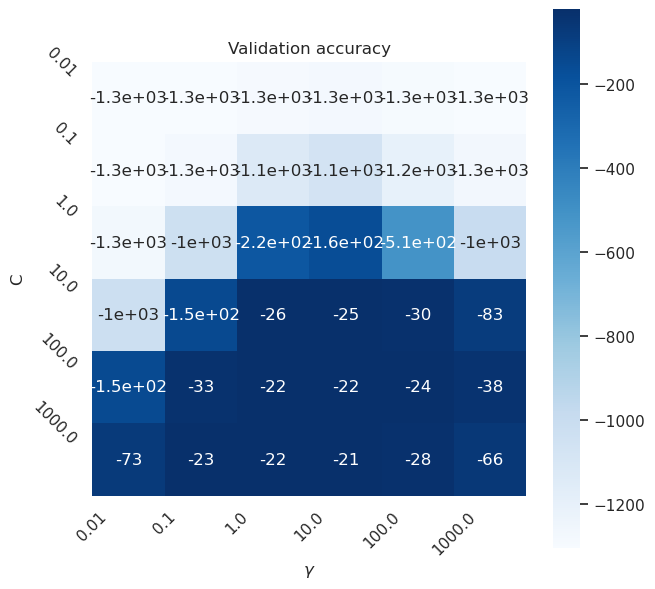

In [12]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
sns.heatmap(scores, annot=True, cmap='Blues', square=True)

plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()